In [1]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import pylab as pl
from astropy import visualization, coordinates, units as u
from astroquery.vizier import Vizier
from photutils import DAOStarFinder
from astropy.wcs.utils import fit_wcs_from_points
import glob
import os
from astropy.coordinates import SkyCoord, frame_transform_graph
from astropy.wcs.utils import (celestial_frame_to_wcs, pixel_to_skycoord, proj_plane_pixel_scales,
                               skycoord_to_pixel, wcs_to_celestial_frame)

#from ..utils import parse_input_data
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
from wcsFunction import findwcs

In [2]:
cd /orange/adamginsburg/w51/gtc/parker/wcsCorrectedImages1

/orange/adamginsburg/w51/gtc/parker/wcsCorrectedImages1


In [3]:
files = !ls *fits

In [4]:
len(files)

182

In [5]:
file1 = fits.open(files[0])
#file1[0].header

In [6]:
path = '/orange/adamginsburg/w51/gtc/parker/ReprojectedImages2'

In [7]:
wcs, shape = find_optimal_celestial_wcs(files)
#wcs.to_header()

In [75]:
#for filename in files:
    
    filehandle = fits.open(filename)
    filename_nosuffix = os.path.splitext(filename)[0]
    new_filename = f'{path}/{filename_nosuffix}_reprojected.fits'
    
    array, footprint = reproject_interp(filename, wcs, shape)
    
    header = filehandle[0].header
    header.update(wcs.to_header())
    
    fits.writeto(f'{new_filename}', array, header, overwrite=True)

IndentationError: unexpected indent (<ipython-input-75-a03a1ac9f594>, line 3)

In [76]:
for filename in files:
    
    filehandle = fits.open(filename)
    filename_nosuffix = os.path.splitext(filename)[0]
    new_filename = f'{path}/{filename_nosuffix}_reprojected.fits'
    
    array, footprint = reproject_interp(filename, wcs, shape)
    
    header = filehandle[0].header
    header.update(wcs.to_header())
    
    hdul = fits.HDUList([fits.PrimaryHDU(data=array, header=header), fits.ImageHDU(footprint)])
    hdul.writeto(new_filename, overwrite=True)

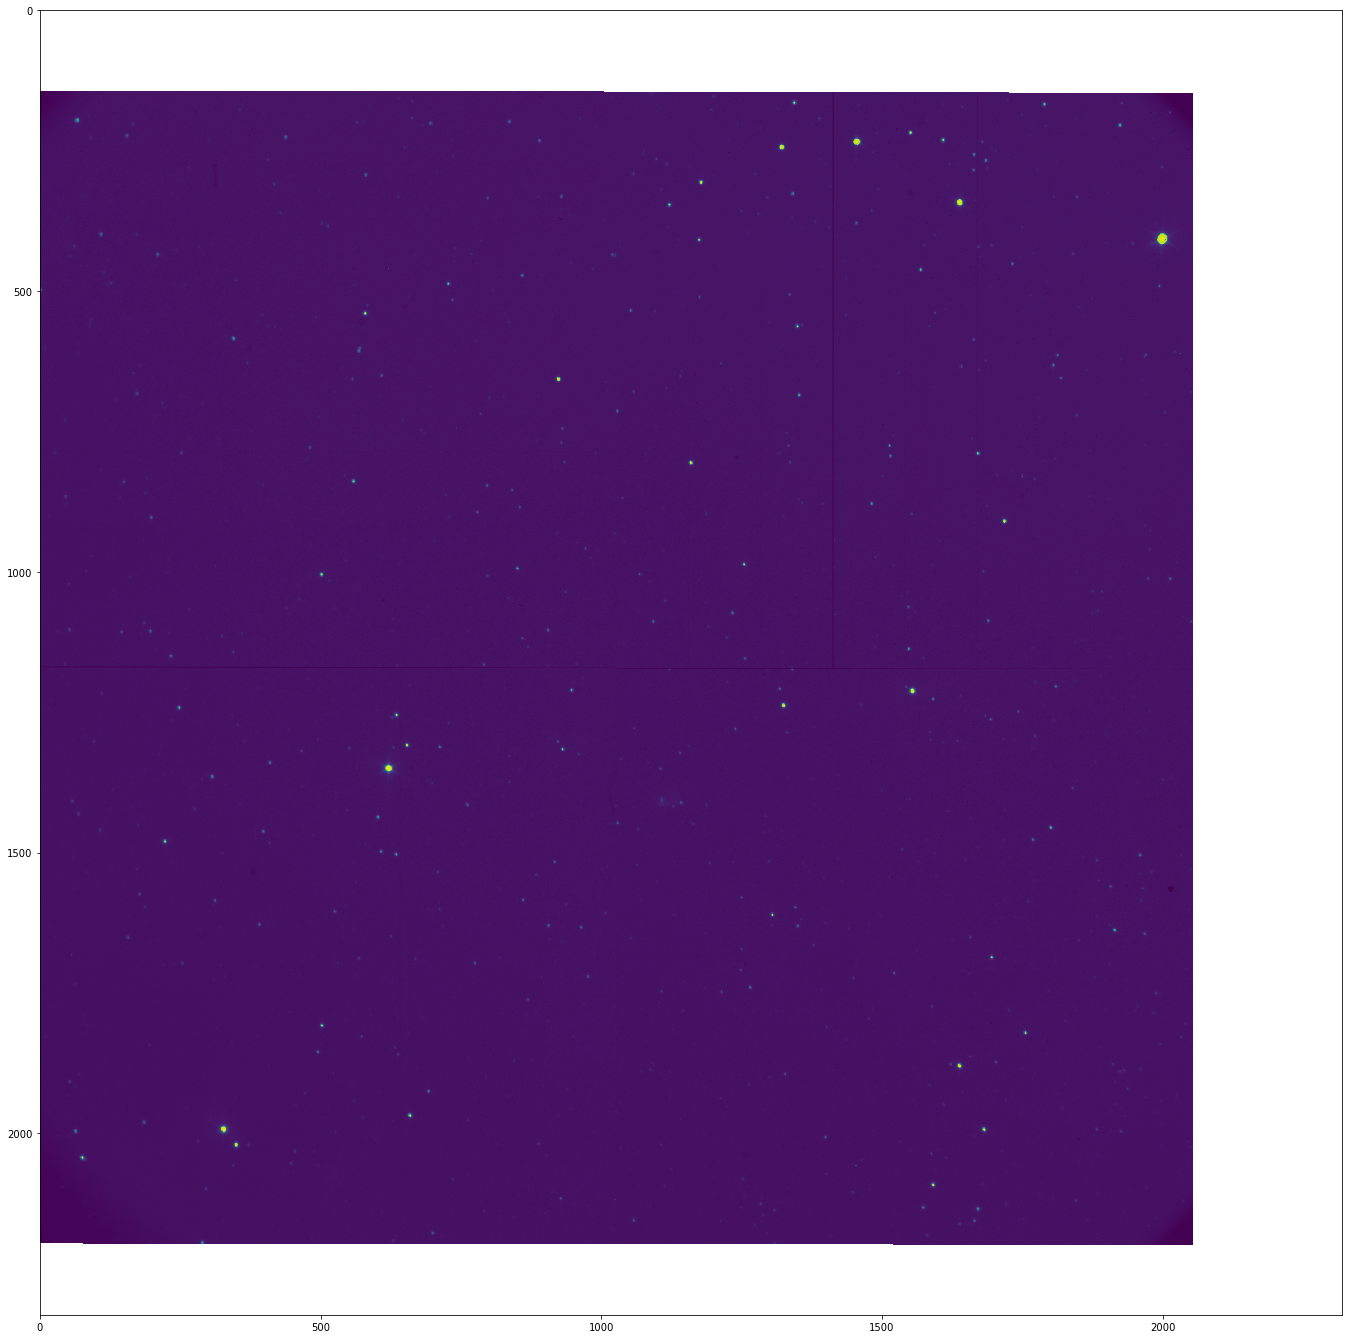

In [11]:
pl.figure(figsize=(24,24))
pl.imshow(array)

In [8]:
cd /orange/adamginsburg/w51/gtc/parker/ReprojectedImages2

/orange/adamginsburg/w51/gtc/parker/ReprojectedImages2


In [9]:
reprojected_files = !ls *fits

In [10]:
len(reprojected_files)

182

In [6]:
reprojected_files[0]

'0002613543-20200712-EMIR-STARE_IMAGE_wcs_corrected_reprojected.fits'

In [9]:
repro_file0 = fits.open(reprojected_files[0])
repro_file0

In [11]:
np.nanmax(repro_file0[0].data)

46167.86516208721

file0 = fits.open(reprojected_files[0])
start_data = np.zeros_like(file0[0].data)
coverage = np.zeros(file0[0].data.shape, dtype='int')
for filename in reprojected_files:
    data = fits.getdata(filename)
    start_data += np.nan_to_num(data)
    coverage +=  np.isfinite(data)
avg = start_data / coverage

In [11]:
file0 = fits.open(reprojected_files[0])
start_data = np.zeros_like(file0[0].data)
ttlcoverage = np.zeros(file0[0].data.shape, dtype='int')
for filename in reprojected_files:
    data = fits.getdata(filename, hdu=0)
    coverage = fits.getdata(filename, ext=1)
    start_data += np.nan_to_num(data) * (coverage == 1)
    ttlcoverage += np.isfinite(data) * (coverage == 1)
avg = start_data / ttlcoverage

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [84]:
coverage

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

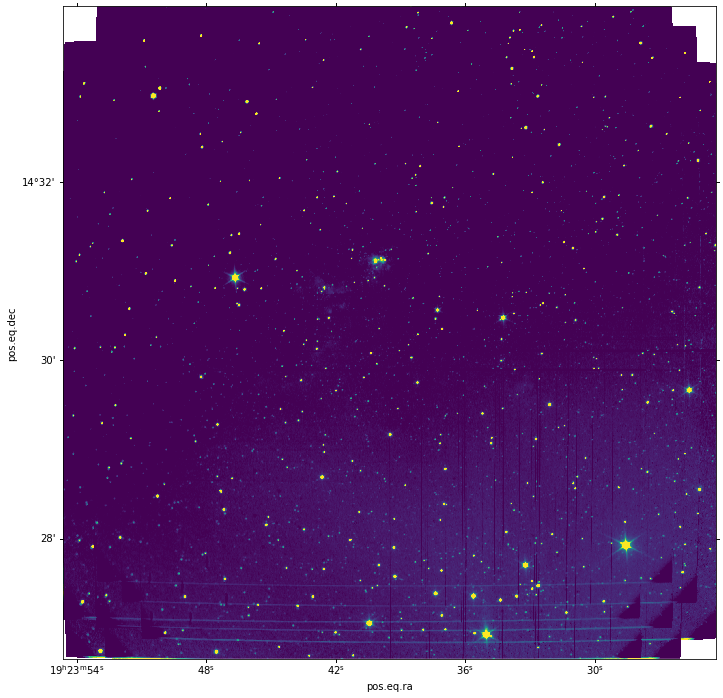

In [16]:
pl.figure(figsize=(12,12))
pl.subplot(projection=wcs)
pl.imshow(avg, vmin = 8000, vmax = 13000)

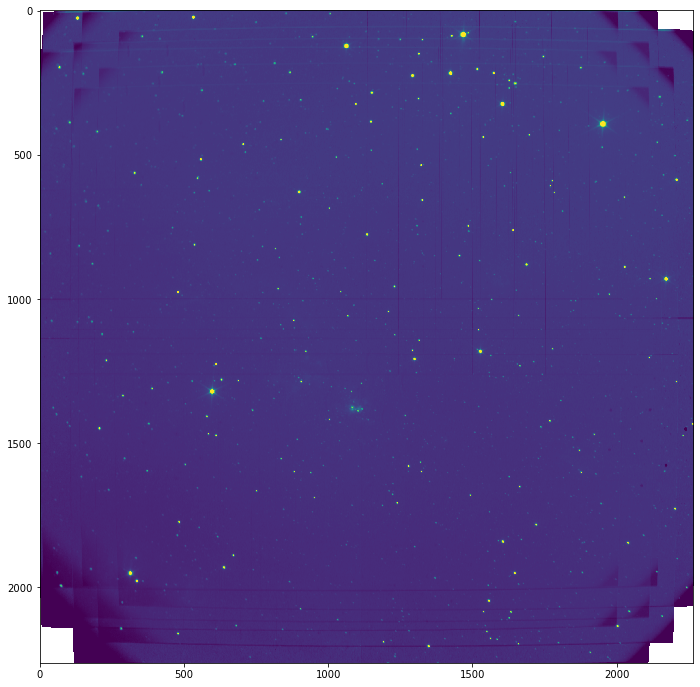

In [60]:
from astropy import visualization
pl.figure(figsize=(12,12))
pl.imshow(avg, norm=visualization.simple_norm(avg, min_percent=1, max_percent=99.95))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DETVER  = 'SCI     '           / 401 Detector used: science or engineering      
NSEC    =                    1 / 402 Number of sequences executed at detector   
NRST    =                   

In [17]:
path = '/orange/adamginsburg/w51/gtc/parker/FinalMosaics'

In [18]:
header = file0[0].header
    
fits.writeto(f'{path}/J_FINAL_MOSAIC.fits', avg, header, overwrite=True)

In [19]:
cd /orange/adamginsburg/w51/gtc/parker/FinalMosaics

/orange/adamginsburg/w51/gtc/parker/FinalMosaics


In [20]:
file = !ls *fits
file[1]

'J_FINAL_MOSAIC.fits'

In [21]:
mosaic = fits.open(file[1])
mosaic

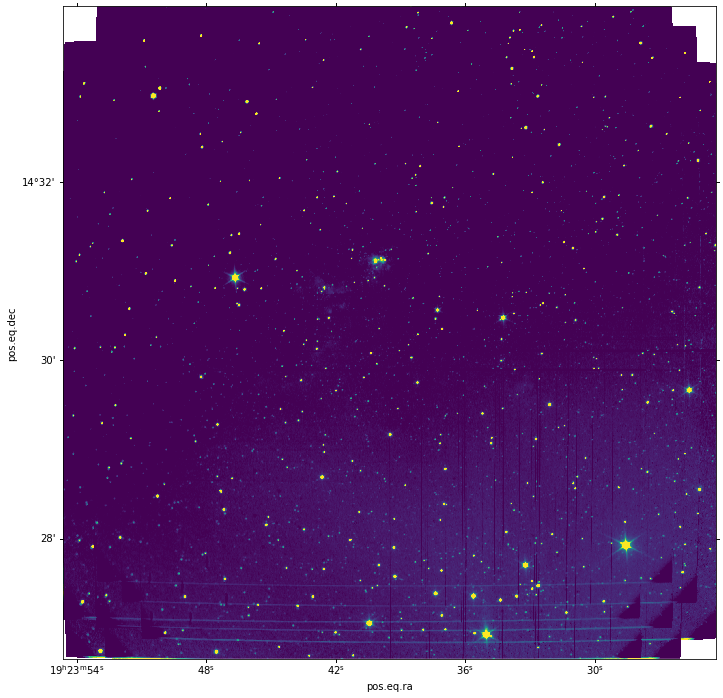

In [22]:
pl.figure(figsize=(12,12))
pl.subplot(projection=wcs)
pl.imshow(mosaic[0].data, vmin = 8000, vmax = 13000)